# Section 10: Using the ACT likelihood 

In this section we will use the pyactlike package to calculate the likelihood of a sample spectrum given the ACT data.   This package is available on [GitHub](https://github.com/ACTCollaboration/pyactlike) and was developed for Aiola et al. 2020, Choi et al. 2020. This package is based off of the Fortran implementation written by Erminia Calabrese and Jo Dunkley. 

We ask that when using these data products you reference the original work in Aiola et al. 2020 and Choi et al. 2020

To return to the main notebook or to view a different section use the links in the table of contents.


## Table of contents

 --- 
> [Section 1](Section_1_Introduction.ipynb): Introduction to AdvACT Data Release 4

> [Section 2](Section_2_coadded_maps.ipynb): S08-18 Coadded maps from [Naess et al. (2020)](https://www.overleaf.com/5395816498bsknshgxbmyr) and an Introduction to Pixell

> [Section 3](Section_3_HEALPix_CAR_Conversions.ipynb):  Demonstration of methods to convert maps between HEALPix format and the CAR format.

> [Section 4](Section_4_visualize_objects.ipynb):  Guide to using Pixell to look at objects in the maps and stacking our maps on catalogue positions.

> [Section 5](Section_5_Lensing_maps.ipynb):  Introduction to the Lensing maps from [Darwish et al](https://arxiv.org/pdf/2004.01139.pdf)

> [Section 6](Section_6_Component_separated_maps.ipynb):  Guide to the use of the Component Separated maps from [Madhavacheril et al. (2020)](https://arxiv.org/abs/1911.05717)

> [Section 7](Section_7_individual_maps_and_harmonic_analysis.ipynb): Maps of Individual Patches and Harmonic Analysis using CAR maps [Aiola et al, in preparation]

> [Section 8](Section_8_Noise_sims.ipynb): Generating Noise Simulations 

> [Section 9](Section_9_E_B_maps.ipynb):  Look at how to generate E and B maps from I, Q, U maps. 

> [Section 10](Section_10_ACT_likelihood.ipynb): Using the ACT Likelihood code
 
> [Section 11](Section_11_delensing_param_shifts.ipynb):  Delensing the CMB powerspectrum and comparing the delensed and lensed parameters from [Han et al. 2020, in preparation]
---


We begin by importing the neccessary packages, in particular the pyactlike package discussed above.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import pyactlike



### Step 1: read in some included example spectra and plot them

(0, 3000)

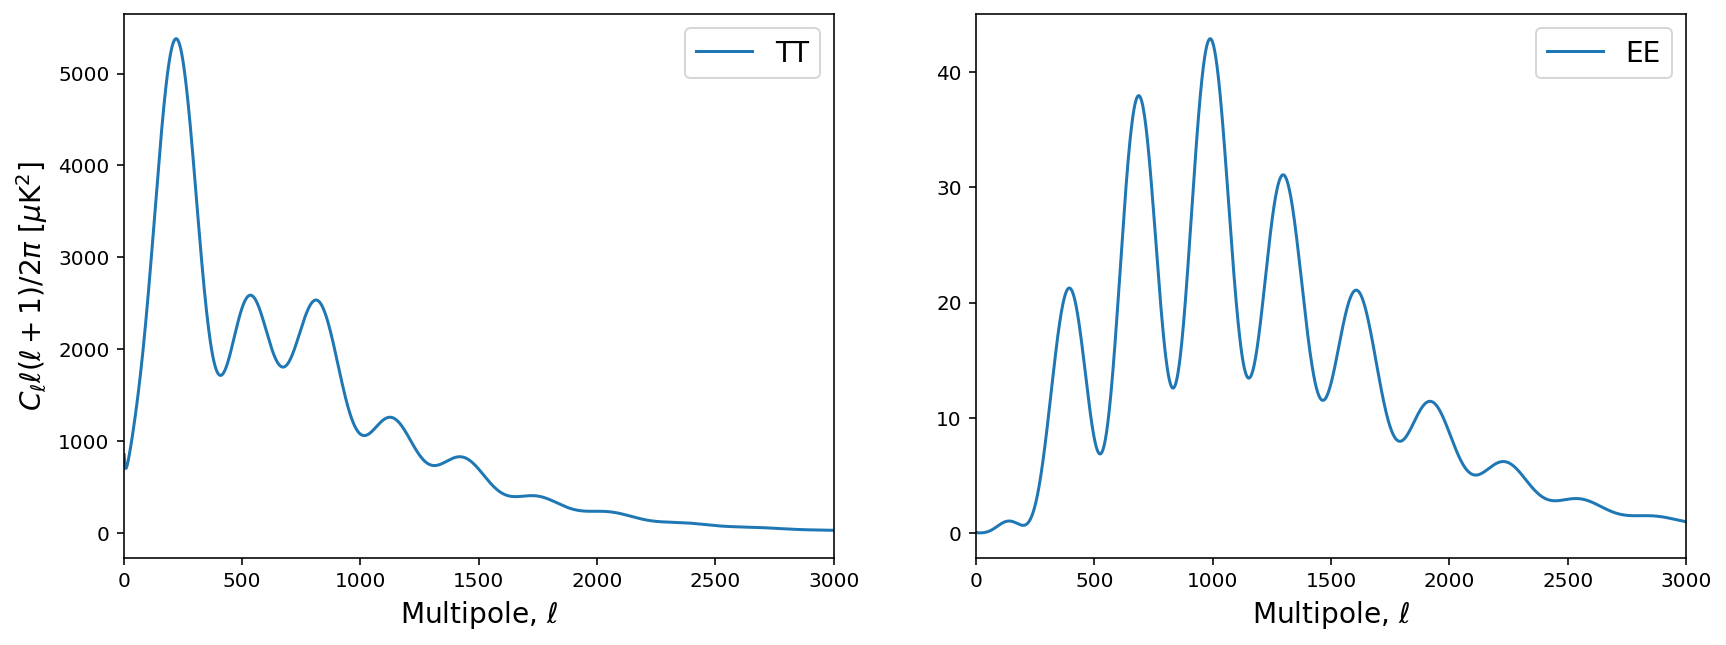

In [12]:
like = pyactlike.ACTPowerSpectrumData()

# Read an example spectrum from disk.
filename = like.data_dir + "bf_ACTPol_Feb24.minimum.theory_cl"

tt_lmax = 6000
ell, dell_tt, dell_te, dell_ee = np.genfromtxt(
    filename,
    delimiter=None,
    unpack=True,
    max_rows=tt_lmax - 1,
    usecols=(0, 1, 2, 3),
)

# Let's quickly plot these spectra 

plt.figure(figsize = (14, 5))

plt.subplot(1,2,1)
plt.plot(ell, dell_tt, "-", label="TT")
plt.ylabel(r"$C_{\ell} \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$", fontsize = 14)
plt.xlabel(r"Multipole, $\ell$", fontsize = 14)
plt.legend(fontsize = 14)
plt.xlim(0,3000)

plt.subplot(1,2,2)
plt.plot(ell, dell_ee, "-", label="EE")
plt.xlabel(r"Multipole, $\ell$", fontsize = 14)
plt.legend(fontsize = 14)
plt.xlim(0,3000)

plt.show()

### Step 2: Compute the likelihood of the spectrum given the ACT data

In this step we also compare to the expected $\chi^2$ value and note that they match up as expected.

In [17]:
# compute the likelihood 

# we set up the calls for the act only as well as the act+wmap likelihoods
act_only = 1.001
act_wmap = 1.003

In [21]:
# Let's start with the ACT only one which we can call with pyactlike:
like = pyactlike.ACTPowerSpectrumData()
chi2 = -2 * like.loglike(dell_tt, dell_te, dell_ee, act_only)
print("ACTPol chi2 = " + "{0:.12f}".format(chi2))
print("Expected:     281.216204088279")

ACTPol chi2 = 281.216204088275
Expected:     281.216204088279


In [16]:
# We can repeat this for the WMAP + ACT likelihood as follows:
like = pyactlike.ACTPowerSpectrumData()
chi2 = -2 * like.loglike(dell_tt, dell_te, dell_ee, act_wmap)
print("ACT + WMAP chi2 = " + "{0:.12f}".format(chi2))
print("Expected:     281.216204088279")

ACT + WMAP chi2 = 280.661756103516
Expected:     281.216204088279


## Step 3: Using MCMC chains generated using the ACT likelihood to look at parameters

The Likelihood we've introduced above can be used to solve for the best fit cosmological parameters that fit the ACT data.  This process and our results are discussed more in Choi et al 2020 and Aiola et al 2020 but here we will show you how to use one of the MCMC chains to look at the parameters

In [16]:
# Begin by reading in a chain and names of the columns
import pandas as pd

path = "/Users/mayamallaby-kay/Desktop/workspace_docker_test/Local_data/"

# Read in the column names
names = pd.read_csv(path + "ACTPol_lcdm.paramnames.csv", names = ["parameter", "latex parameter name"])
chain = np.genfromtxt(path + "ACTPol_lcdm_1.txt")
names["parameter"]

0         omegabh2
1         omegach2
2            theta
3              tau
4             logA
5               ns
6               yp
7              H0*
8          omegal*
9          omegam*
10       omegamh2*
11      omeganuh2*
12       omegamh3*
13         sigma8*
14     s8omegamp5*
15    s8omegamp25*
16           s8h5*
17     rmsdeflect*
18           zrei*
19              A*
20          clamp*
21           DL40*
22          DL220*
23          DL810*
24         DL1420*
25         DL2000*
26           ns02*
27        yheused*
28          YpBBN*
29          DHBBN*
30            age*
31          zstar*
32          rstar*
33      thetastar*
34         DAstar*
35          zdrag*
36          rdrag*
37             kd*
38         thetad*
39            zeq*
40            keq*
41        thetaeq*
42      thetarseq*
43        rsDv057*
44      Hubble057*
45          DA057*
46         FAP057*
47    fsigma8z057*
48     sigma8z057*
49    chi2_ACTPol*
50     chi2_prior*
Name: parameter, dtype: object

We will focus on H0 and Omega Matter here but as you can see there are other parameters we include in these chans and a similar approach can be taken with the other parameters if you wish to do so. 

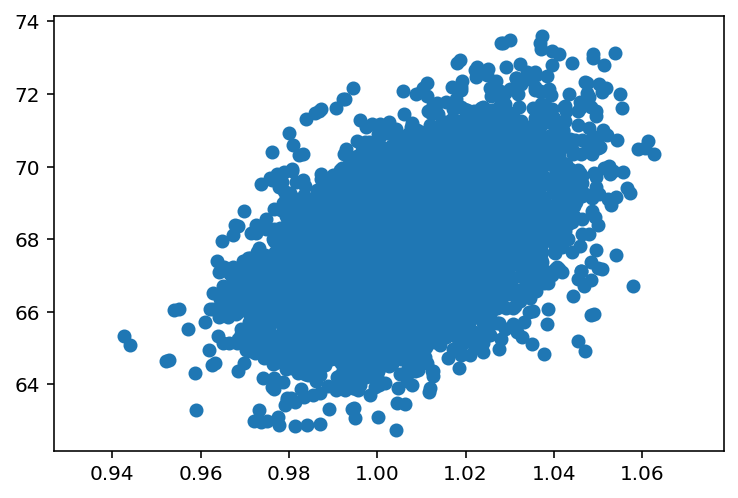

In [25]:
plt.scatter(chain[:,7], chain[:,9])
